In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use("ggplot")
from matplotlib import figure
matplotlib.rcParams['figure.figsize'] = (12,8)
import psycopg2
pd.options.mode.chained_assignment = None

#connect to postgresql

# read the data
df = pd.read_csv('cel_export.csv', encoding='utf-8',error_bad_lines=False)
df_copy = df.copy()
df_copy.head()




,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Nom retenu,Numéro nomenclatural nom retenu,Famille,Référentiel taxonomique,Certitude,Type d'observation,...,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc,ext:com-arbres,ext:latitude-arbres,ext:longitude-arbres,ext:altitude-arbres
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN
3,urn:lsid:tela-botanica.org:cel:3601644,3601644,Xanthoria parietina,59568.0,Xanthoria parietina,59568.0,NaN,taxref,à déterminer,observation de terrain,...,NaN,NaN,Rue de Taxo,NaN,3601642.0,n2;n3;n4;,NaN,NaN,NaN,NaN
4,urn:lsid:tela-botanica.org:cel:3601645,3601645,Physcia adscendens/tenella,196232.0,Physcia adscendens/tenella,196232.0,NaN,taxref,à déterminer,observation de terrain,...,NaN,NaN,Rue de Taxo,NaN,3601642.0,n1;n2;n3;n4;n5;,NaN,NaN,NaN,NaN


# carte de chaleur des valeurs manquantes. jaunes : valeurs manquantes, bleu : valeurs non manquantes

In [16]:
cols = df_copy.columns[df.isnull().mean()>0.5]
cols = df_copy.drop(cols, axis=1)

type(cols)

pandas.core.frame.DataFrame

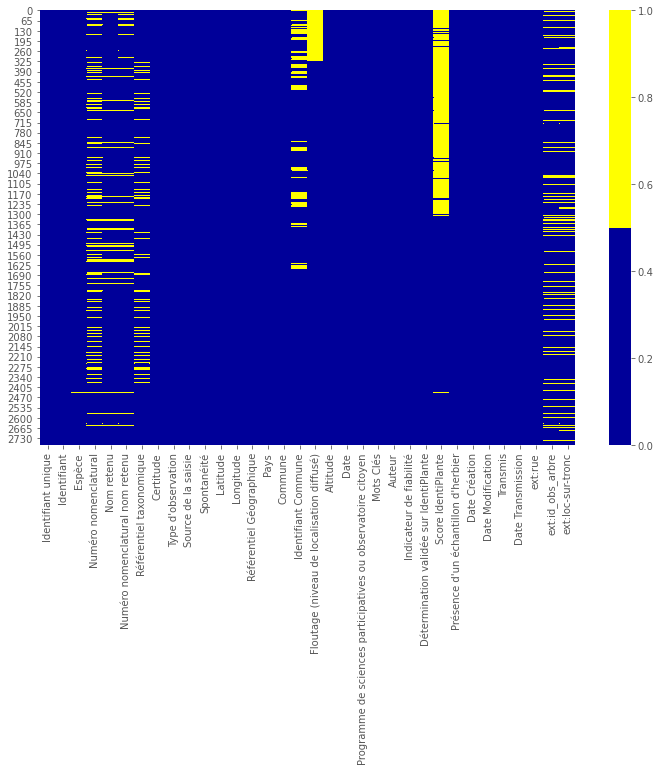

In [17]:
cols2 = cols.columns[:] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols2].isnull(), cmap=sns.color_palette(colours))
plt.show()

# supression des colonnes null


In [4]:
#Pourcentages des valeurs manquantes dans les données
"""
La fonction isna() de pandas permet de détercter les valeurs manquantes dans le dataframe
voir : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
"""

'\nLa fonction isna() de pandas permet de détercter les valeurs manquantes dans le dataframe\nvoir : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html\n'

In [22]:
def valeur_manquante(df):
    """
    @:param : dataframe
    imprime les valeurs manquantes en pct / colonnes"""
    for col in cols.columns:
        pct_missing = df[col].isna().mean() * 100
        if(pct_missing !=0):
            print("{} ==> {}%".format(col, round(pct_missing, 2)))

print(valeur_manquante(cols))

Espèce ==> 0.14%
Numéro nomenclatural ==> 20.57%
Nom retenu ==> 7.49%
Numéro nomenclatural nom retenu ==> 9.29%
Référentiel taxonomique ==> 11.24%
Identifiant Commune ==> 14.34%
Floutage (niveau de localisation diffusé) ==> 11.74%
Score IdentiPlante ==> 45.03%
ext:id_obs_arbre ==> 14.88%
ext:loc-sur-tronc ==> 15.35%
None


In [23]:
cols.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Identifiant unique                                            2776 non-null   object 
 1   Identifiant                                                   2776 non-null   int64  
 2   Espèce                                                        2772 non-null   object 
 3   Numéro nomenclatural                                          2205 non-null   float64
 4   Nom retenu                                                    2568 non-null   object 
 5   Numéro nomenclatural nom retenu                               2518 non-null   float64
 6   Référentiel taxonomique                                       2464 non-null   object 
 7   Certitude                                                     2776 no

In [21]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

Identifiant unique - 0.0%
Identifiant - 0.0%
Espèce - 0.0%
Numéro nomenclatural - 21.0%
Nom retenu - 7.0%
Numéro nomenclatural nom retenu - 9.0%
Famille - 59.0%
Référentiel taxonomique - 11.0%
Certitude - 0.0%
Type d'observation - 0.0%
Source de la saisie - 0.0%
Spontanéité - 0.0%
Latitude - 0.0%
Longitude - 0.0%
Référentiel Géographique - 0.0%
Pays - 0.0%
Commune - 0.0%
Identifiant Commune - 14.0%
Floutage (niveau de localisation diffusé) - 12.0%
Altitude - 0.0%
Lieu-dit - 100.0%
Milieu - 100.0%
Date - 0.0%
Notes - 92.0%
Programme de sciences participatives ou observatoire citoyen - 0.0%
Mots Clés - 0.0%
Lien vers l'observation sur IdentiPlante - 91.0%
Image(s) - 91.0%
Auteur - 0.0%
Cohérence entre la localité et les coordonnées GPS - 100.0%
Précision de la localisation - 100.0%
Station - 100.0%
Indicateur de fiabilité - 0.0%
Détermination validée sur IdentiPlante - 0.0%
Score IdentiPlante - 45.0%
Abondance - 100.0%
Phénologie - 100.0%
Présence d'un échantillon d'herbier - 0.0%
Date C

# Histogramme des valeurs manquantes 

In [ ]:
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
plt.show()